In [1]:
import os
import matplotlib.pyplot as plt
import Utilities.file_utilities as file_utils
import Utilities.Plotting.plot_distributions_spectra as plt_dist
import Utilities.Plotting.plotting_utilities as plotting
import Utilities.DataProcessing.data_import as dp_utils
import Utilities.DataProcessing.signal_processing_utils as sigutils

if __name__ == "__main__":
    # File paths
    hybridcosim_path = os.environ.get("HYBRIDCOSIM_REPO_PATH", "../../")
    csv_file_path = os.path.join(hybridcosim_path, "Data/AEE/Resampled15min.csv")
    fig_save_path = os.path.join(hybridcosim_path, "DataAnalysis","DataProcessingAEE","Solarhouse1","Figures")

    # Create output dir, read csv
    file_utils.create_dir(fig_save_path)
    df_orig = dp_utils.import_data(csv_file_path)

In [2]:
    #df = df[7050:7800] # 16.04 - 23.04 data window to check the data, the whole year is too detailed
    #df = df[7400:7600]
    df = df_orig[10000:10500]

In [3]:
    # Label definitions
    input_temperatures = ["TSolStor", "TOfenVL", "TWPVL", "TFBHRL", "TSchwimmbadVL"]
    legend_input_temperatures = ["TSolStorage","TOfenVL","TWPVL","TFBHRL","TSchwimmbadVL"]
    storage_tank_temperatures = ["TPuffero", "TPuffermo", "TPuffermu", "TPufferu"]
    legend_storage_tank_temperatures = ["Top Temperature (TPo)","Middle top temperature (TPmo)", "Middle bottom temperature (TPmo)","Bottom Temperature (TPu)"]
    curves_massflows_sources = ["VDSolarStorage", "VDWP", "VDOfen"]
    legend_massflows_sources = ["VD Solar [l/h]", "VD Heat Pump [l/h]", "VD Oven [l/h]"]
    curves_massflows_sinks = ["VDStoragePool", "VDFBHSchwimmbad"]
    legend_massflows_sinks = ["VD Pool [l/h]", "VD Floor Heating [l/h]"]
    massflows = ["VDSolarStorage", "VDOfen", "VDWP", "VDFBHSchwimmbad", "VDStoragePool"]

    #################################### Distributions #################################################################

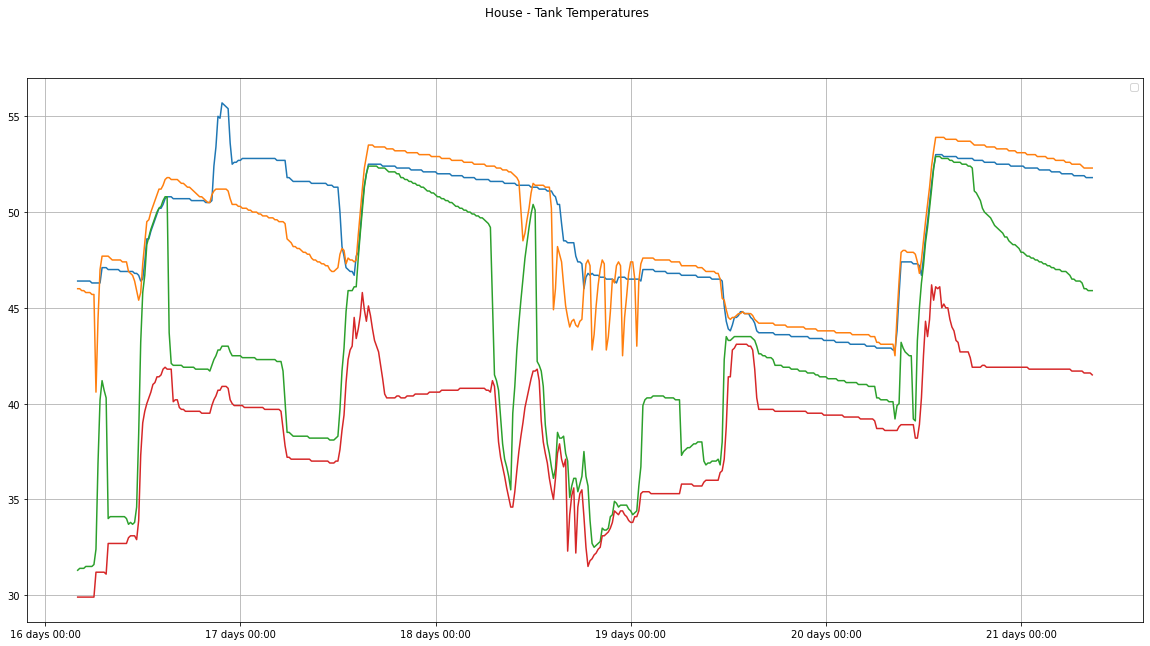

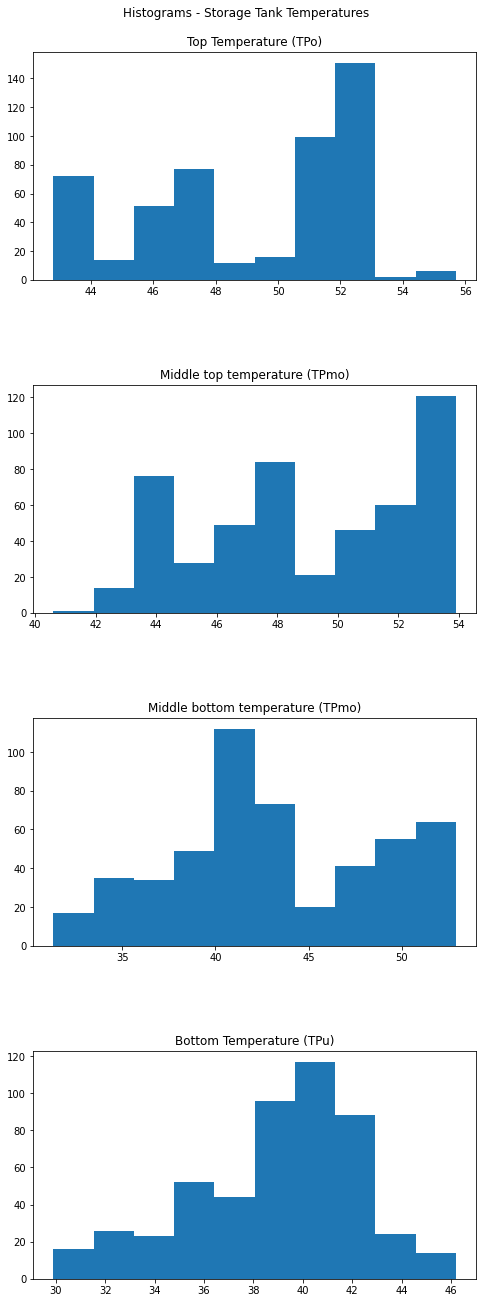

In [4]:
    # Storage Tank temperatures
    plotting.plt_subplots([df[storage_tank_temperatures]], fig_save_path=fig_save_path, fig_title="House - Tank Temperatures", figsize=(20,10), xdate_format="%d days %H:%M")
    # Storage Tank Temperatures - Distribution
    plt_dist.plot_histograms(df[storage_tank_temperatures],fig_save_path,"Histograms - Storage Tank Temperatures",legend_storage_tank_temperatures)

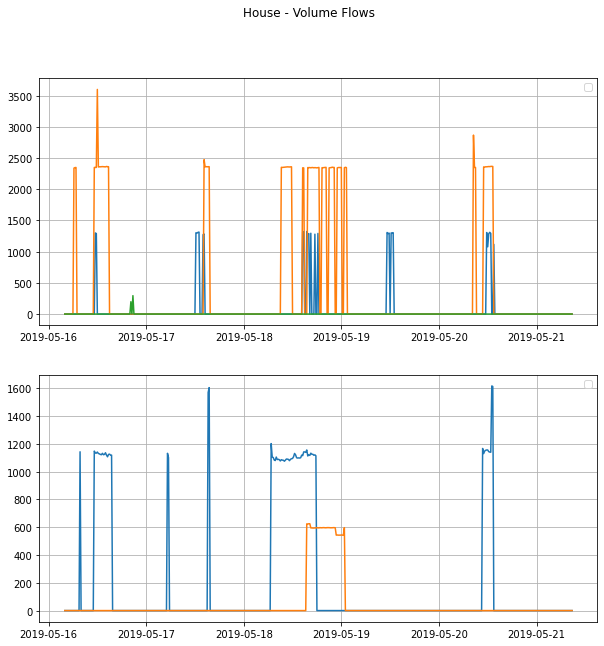

In [5]:
    # Mass flows
    plotting.plt_subplots([df[curves_massflows_sources], df[curves_massflows_sinks]], fig_save_path=fig_save_path, fig_title="House - Volume Flows",figsize=(10,10))


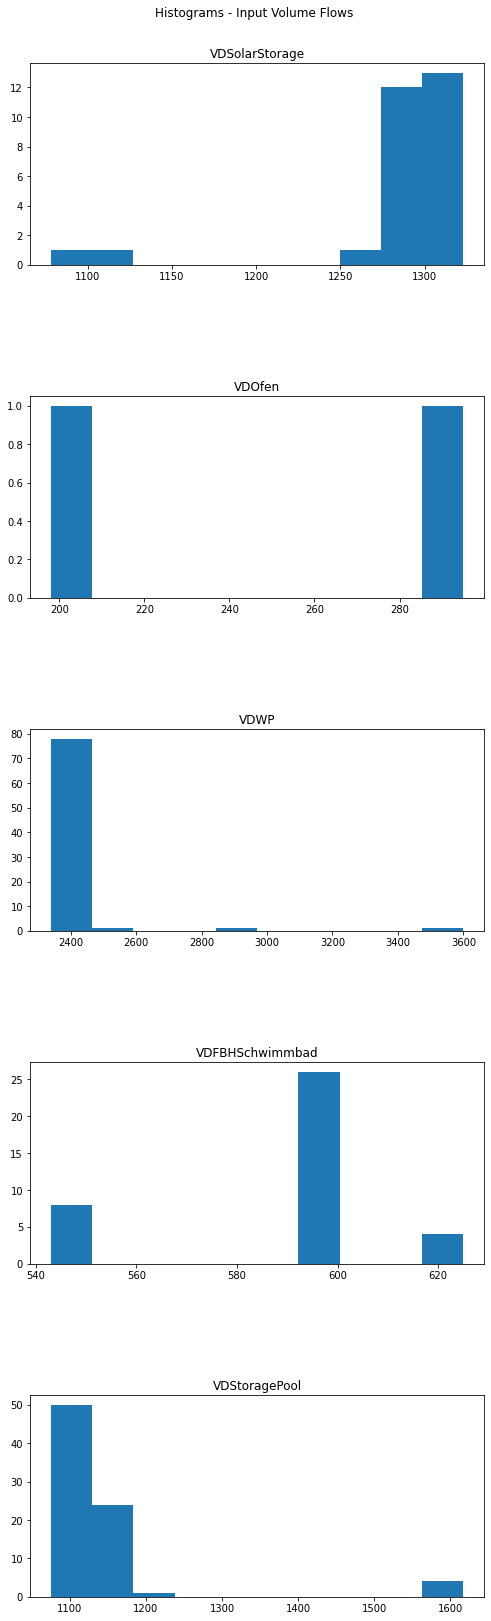

In [6]:
    # Mass flows - Distribution
    # Omit zero values in distribution
    cur_data, _ = sigutils.threshold_data(df, massflows, massflows)
    plt_dist.plot_histograms(cur_data,fig_save_path,"Histograms - Input Volume Flows",massflows)

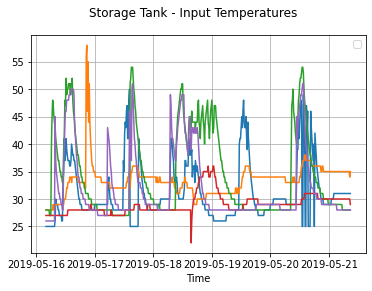

In [7]:
    # Input Temperatures
    plotting.plot_result(df[input_temperatures], fig_save_path, "Storage Tank - Input Temperatures")

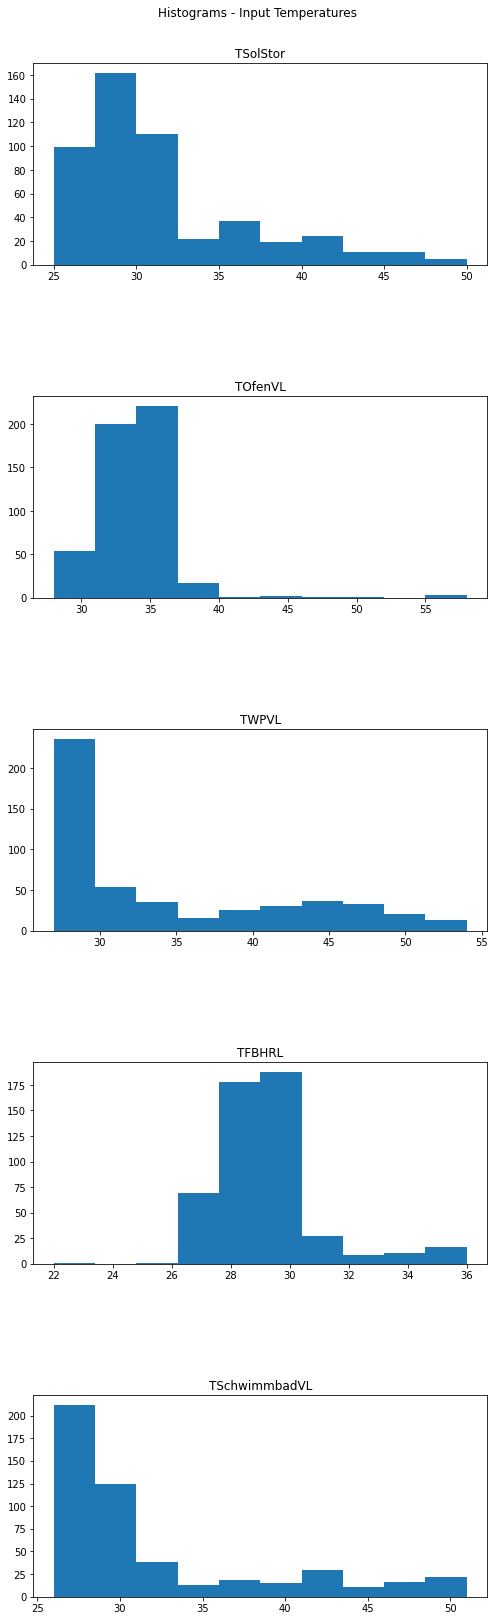

In [8]:
    # Temperatures - Distribution
    plt_dist.plot_histograms(df[input_temperatures],fig_save_path,"Histograms - Input Temperatures",input_temperatures)
    histograms = sigutils.calc_hists(df[input_temperatures])
    #plotting.plt_subplots(histograms,fig_save_path,"Histograms - Input Temperatures")

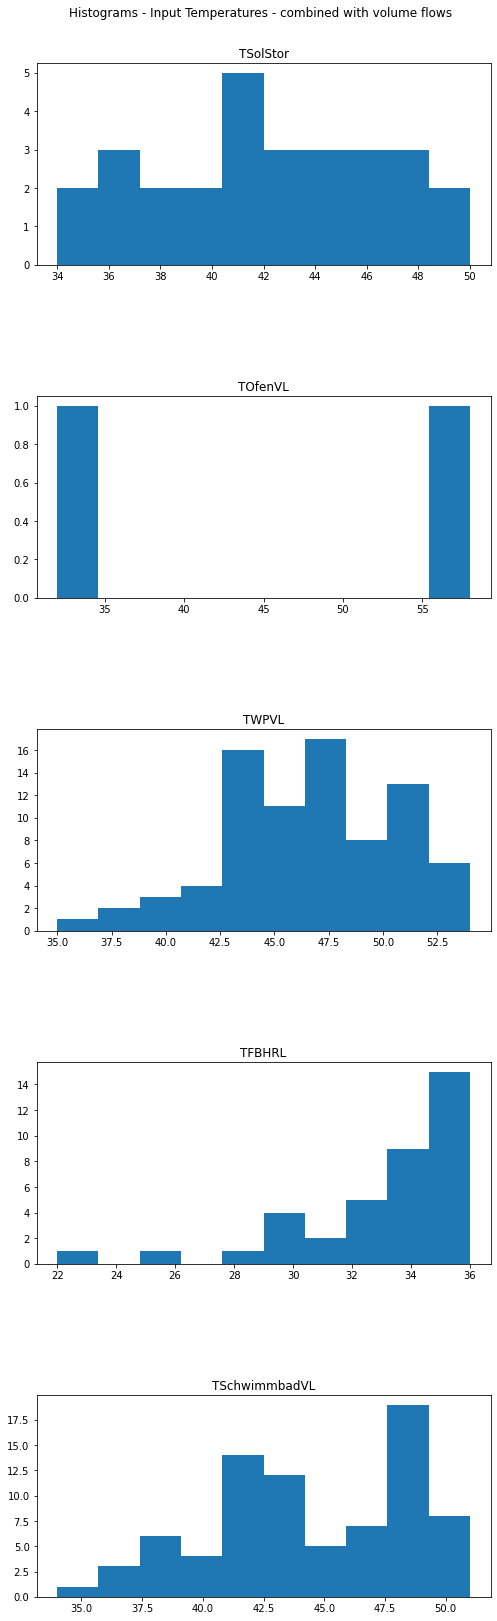

D:\GitHub\TUG-CPS\hybridcosim\venv_39\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


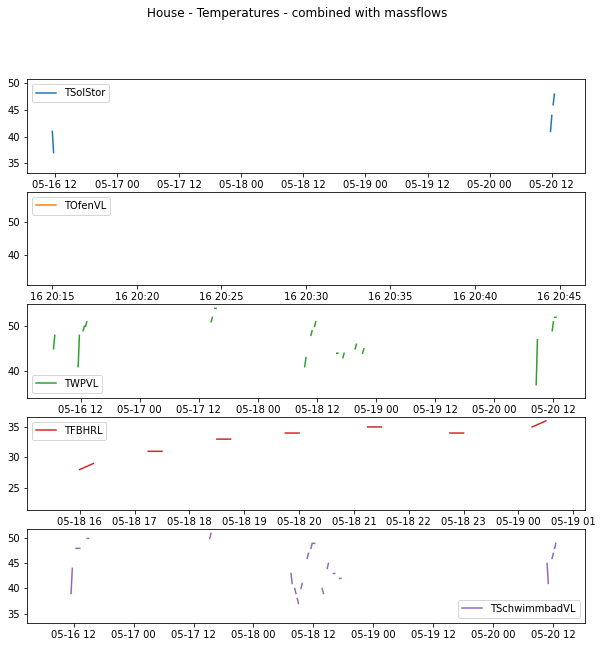

In [9]:
    # Combination of massflow and temperature
    data_pruned = sigutils.prune_data(df, input_temperatures, massflows)
    # Distributions
    plt_dist.plot_histograms(data_pruned,fig_save_path,"Histograms - Input Temperatures - combined with volume flows", input_temperatures)
    # Timeseries
    plotting.plot_df_subplots(data_pruned[input_temperatures],fig_save_path=fig_save_path,fig_title='House - Temperatures - combined with massflows', figsize=(10,10), labels=input_temperatures)

In [10]:
    ###################################### Correlations ###############################################################

    # Switch - Volume flow from storage to pool - pool is main contributor
    switch_storage_pool = ["VDStoragePool"]
    legend_switch_storage_pool = ["Volume flow Storage to Pool"]

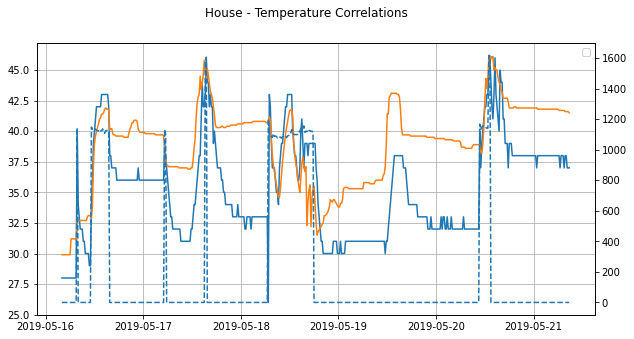

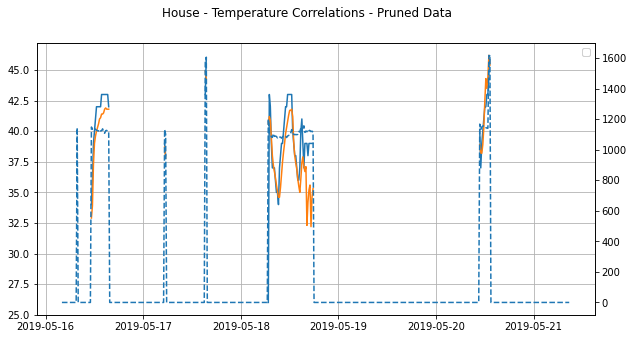

In [11]:
    # Temperature Correlations - Bottom temperature
    curves = ["TSchwimmbadRL", "TPufferu"]
    legend_curves =["Pool return temperature","Tank bottom temperature"]
    data = [[plotting.rename_columns(df[curves],legend_curves), plotting.rename_columns(df[switch_storage_pool], legend_switch_storage_pool)]]
    plotting.plt_subplots(data, fig_save_path=fig_save_path, fig_title="House - Temperature Correlations", figsize=(10,5),linestyle="--")

    # Temperature Correlations - Pruned Data
    data_pruned = sigutils.prune_data(df, curves, switch_storage_pool)
    data = [[plotting.rename_columns(data_pruned[curves], legend_curves), plotting.rename_columns(df[switch_storage_pool], legend_switch_storage_pool)]]
    plotting.plt_subplots(data, fig_save_path=fig_save_path, fig_title="House - Temperature Correlations - Pruned Data", figsize=(10,5), linestyle="--")

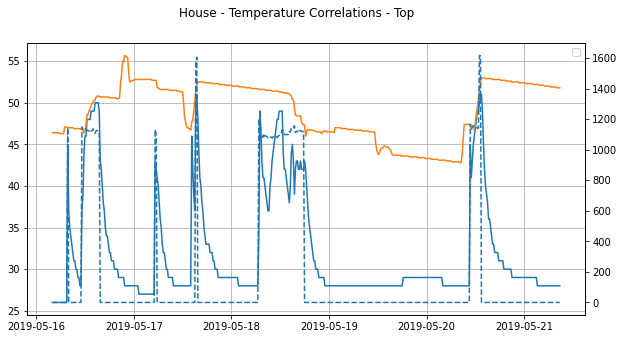

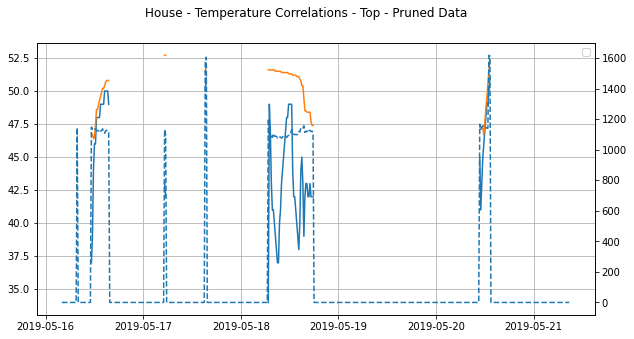

In [12]:
    # Temperature Correlations - Top temperature
    curves = ["TSchwimmbadVL", "TPuffero"]
    data = [[df[curves], df[switch_storage_pool]]]
    legend_curves = ["Solar supply temperature","Tank top temperature"]
    labels = [[legend_curves, legend_switch_storage_pool]]
    plotting.plt_subplots(data, fig_save_path=fig_save_path, fig_title="House - Temperature Correlations - Top", figsize=(10,5), linestyle="--")
    # Temperature Correlation - Pruned Data
    data_pruned = sigutils.prune_data(df, curves, switch_storage_pool)
    data = [[data_pruned[curves], df[switch_storage_pool]]]
    plotting.plt_subplots(data, fig_save_path=fig_save_path, fig_title="House - Temperature Correlations - Top - Pruned Data", figsize=(10,5), linestyle="--")

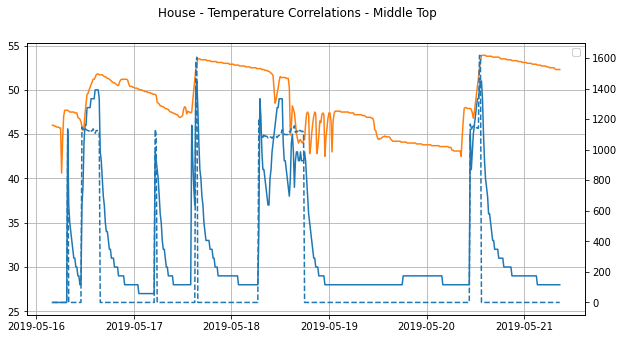

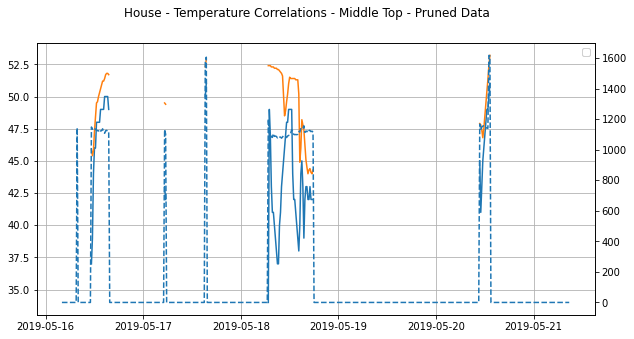

In [13]:
    # Temperature Correlations - Middle Top
    curves = ["TSchwimmbadVL", "TPuffermo"]
    legend_curves = ["Storage to Pool Temperature","Tank middle top temperature"]
    data = [[df[curves], df[switch_storage_pool]]]
    labels = [[legend_curves, legend_switch_storage_pool]]
    plotting.plt_subplots(data, fig_save_path=fig_save_path, fig_title="House - Temperature Correlations - Middle Top", figsize=(10,5), linestyle="--")
    # Temperature Correlation - Pruned Data
    data_pruned = sigutils.prune_data(df, curves, switch_storage_pool)
    data = [[data_pruned[curves], df[switch_storage_pool]]]
    plotting.plt_subplots(data, fig_save_path=fig_save_path, fig_title="House - Temperature Correlations - Middle Top - Pruned Data", figsize=(10,5), linestyle="--")

D:\GitHub\TUG-CPS\hybridcosim\venv_39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


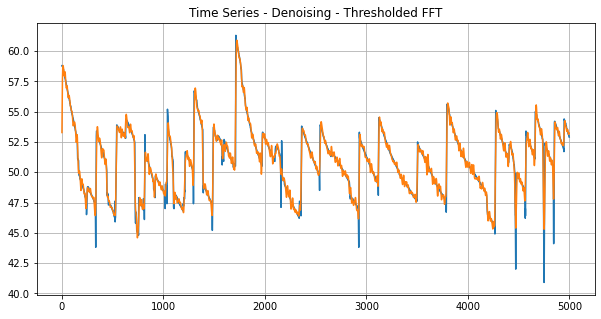

In [14]:
    TPuffero = df_orig["TPuffero"]
    df_fftthresh = sigutils.fft_threshold(TPuffero, 0.01)
    selector = range(5000)
    plt.figure(figsize=(10, 5))
    plt.grid('both')
    plt.title("Time Series - Denoising - Thresholded FFT")
    plt.plot(TPuffero.values[selector])
    plt.plot(df_fftthresh[selector])
    plt.show()


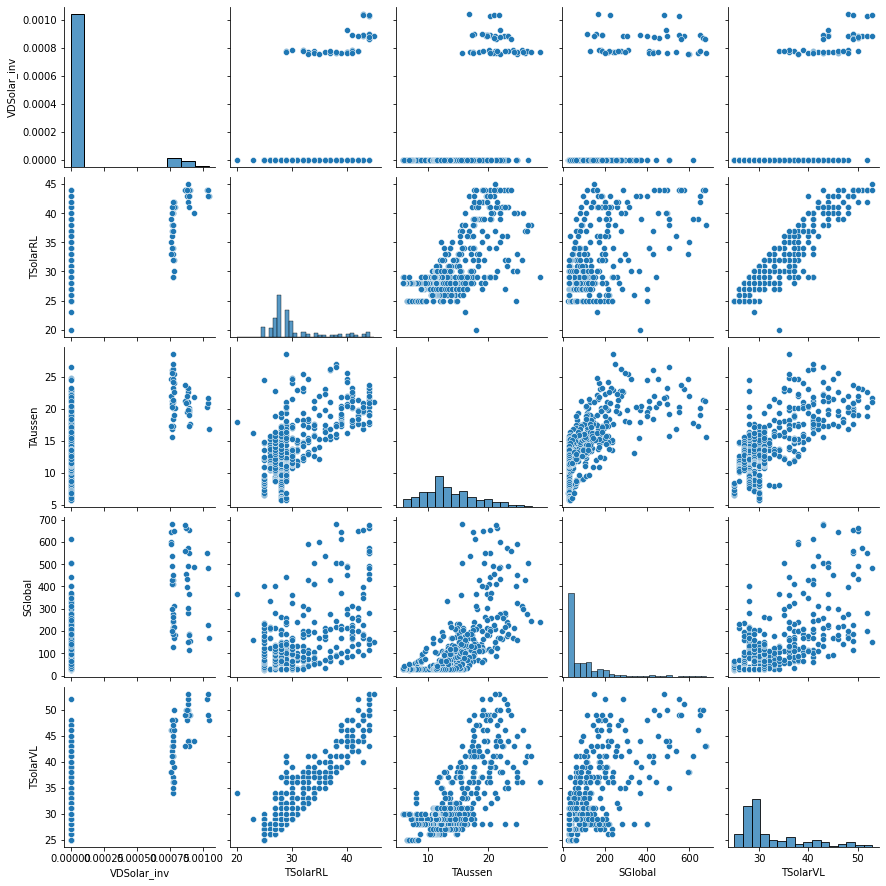

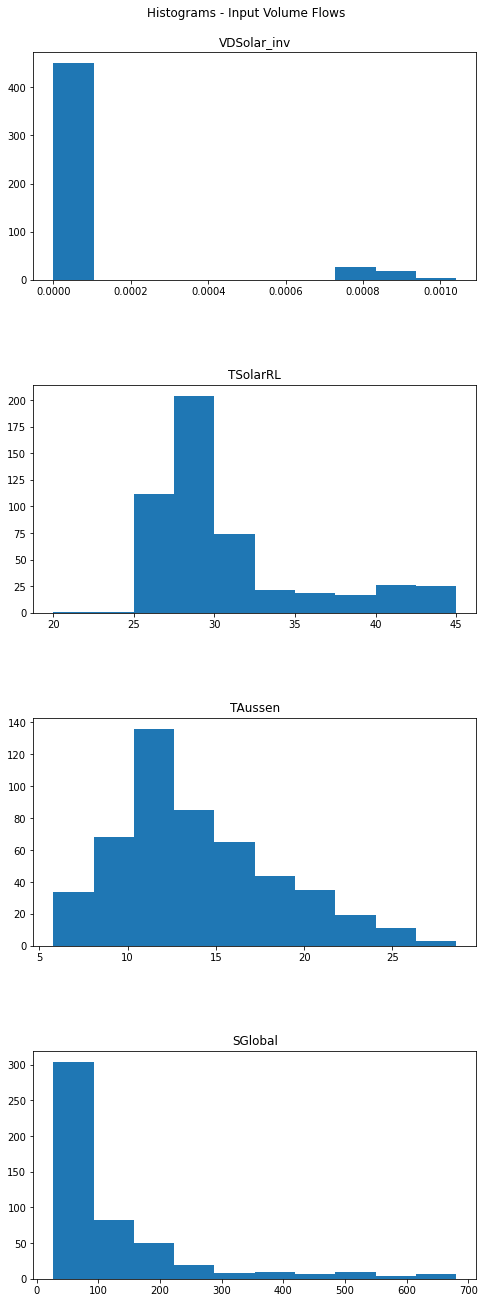

0.382


In [23]:
    import seaborn as sns
    solar_labels = ['VDSolar_inv', 'TSolarRL','TAussen','SGlobal']
    cur_data = df[solar_labels + ['TSolarVL']]
    sns.pairplot(cur_data)

    plt_dist.plot_histograms(cur_data,fig_save_path,"Histograms - Input Volume Flows",solar_labels)

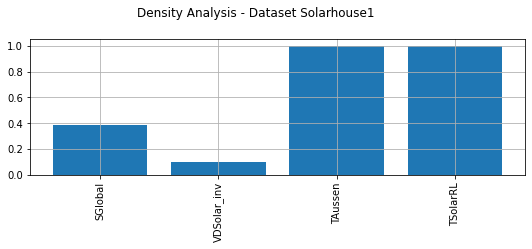

In [26]:
    import numpy as np
    columns = ['SGlobal','VDSolar_inv','TAussen','TSolarRL']
    density = np.sum(df[columns] > 0) / df.shape[0]
    density[0] = np.sum(df['SGlobal'] < 30) / df.shape[0]

    plotting.barplot(columns, density,fig_save_path='./Figures', fig_title='Density Analysis - Dataset Solarhouse1', figsize=(8,4))
